In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import numpy as np


# Load

In [ ]:
df=pd.read_csv('data/employee_data.csv')

In [3]:
df.shape

(10000, 10)

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [6]:
df.describe()

,employee_id,age,salary,tenure_years,enrolled
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,15000.50000,43.0020,65032.967907,3.967720,0.617400
std,2886.89568,12.2858,14923.958446,3.895488,0.486046
min,10001.00000,22.0000,2207.790000,0.000000,0.000000
25%,12500.75000,33.0000,54714.342500,1.200000,0.000000
50%,15000.50000,43.0000,65056.050000,2.800000,1.000000
75%,17500.25000,54.0000,75053.687500,5.600000,1.000000
max,20000.00000,64.0000,120312.000000,36.000000,1.000000


In [7]:
df.isnull().sum()

employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64

In [8]:
df['enrolled'].value_counts()

enrolled
1    6174
0    3826
Name: count, dtype: int64

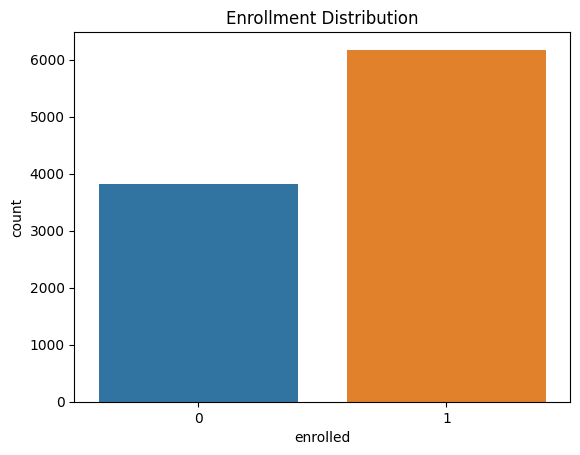

enrolled
1    0.6174
0    0.3826
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='enrolled', data=df)
plt.title("Enrollment Distribution")
plt.show()

print(df['enrolled'].value_counts(normalize=True))


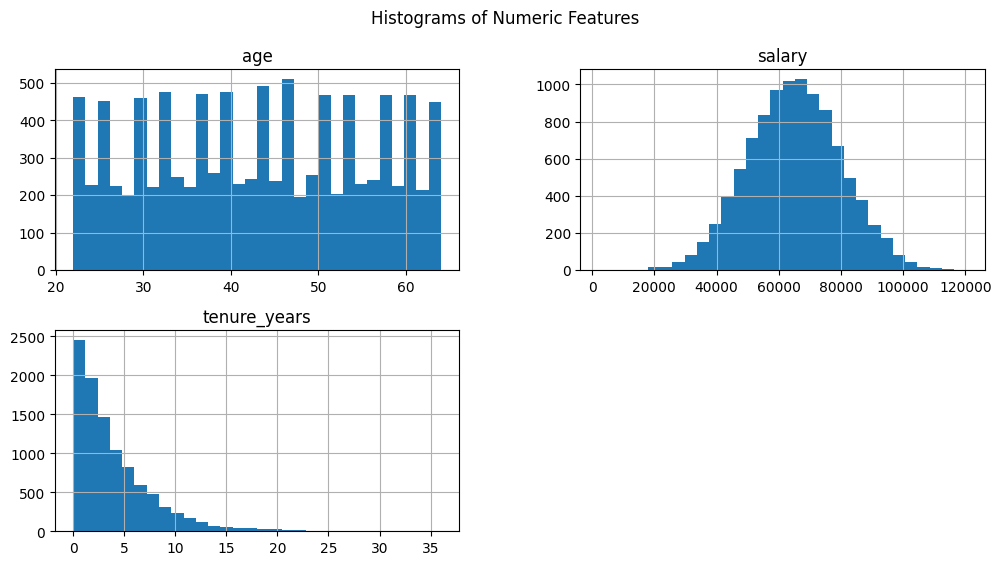

age            -0.001981
salary          0.003895
tenure_years    1.973960
dtype: float64


In [10]:
num_cols = ['age', 'salary', 'tenure_years']

df[num_cols].hist(figsize=(12, 6), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Check skewness
print(df[num_cols].skew())


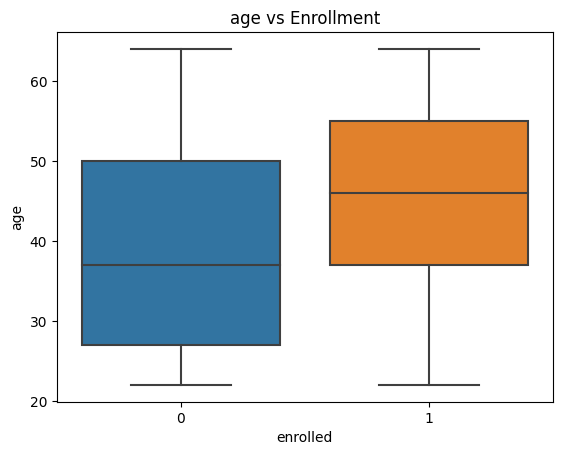

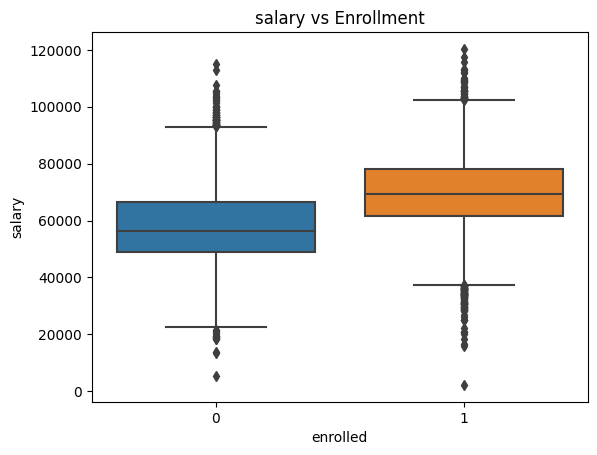

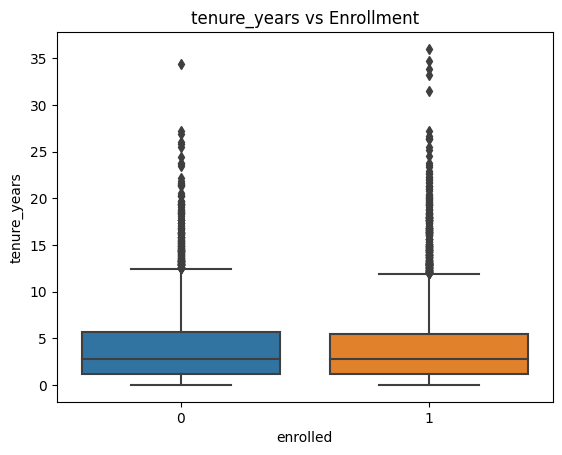

In [11]:
for col in num_cols:
    sns.boxplot(x='enrolled', y=col, data=df)
    plt.title(f"{col} vs Enrollment")
    plt.show()


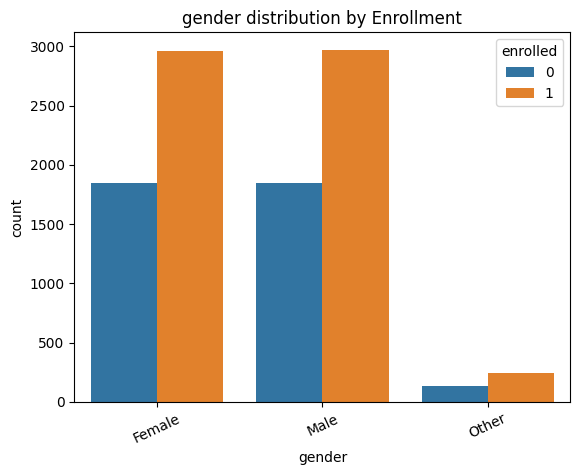

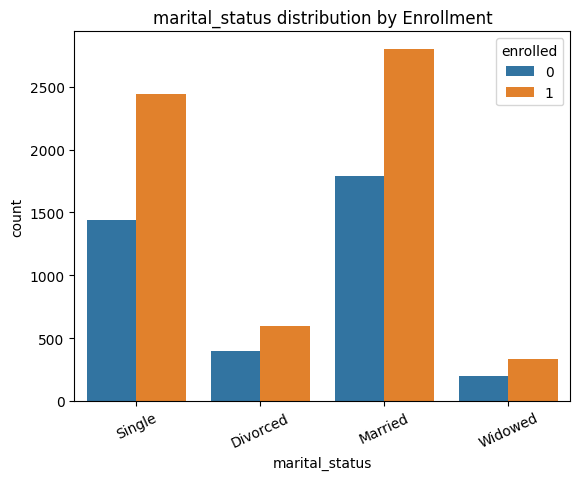

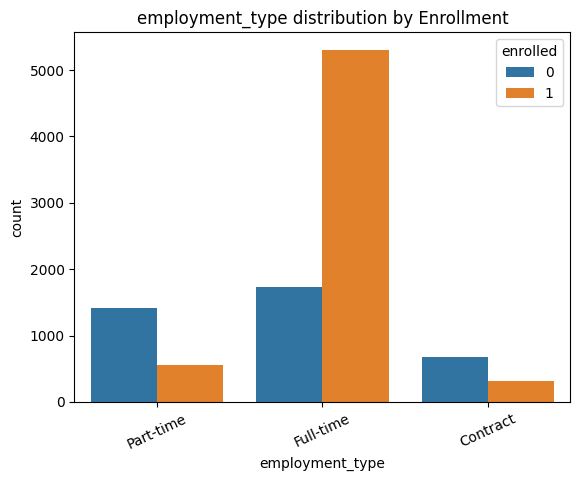

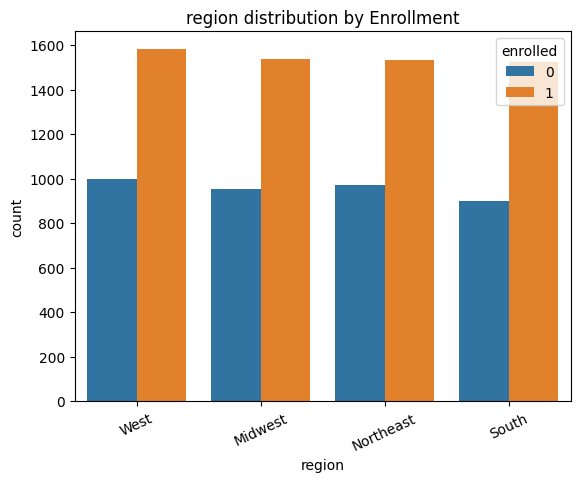

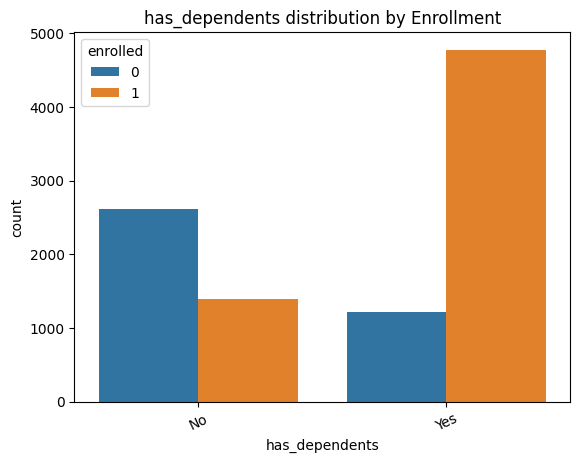

In [12]:
cat_cols = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='enrolled')
    plt.title(f"{col} distribution by Enrollment")
    plt.xticks(rotation=25)
    plt.show()


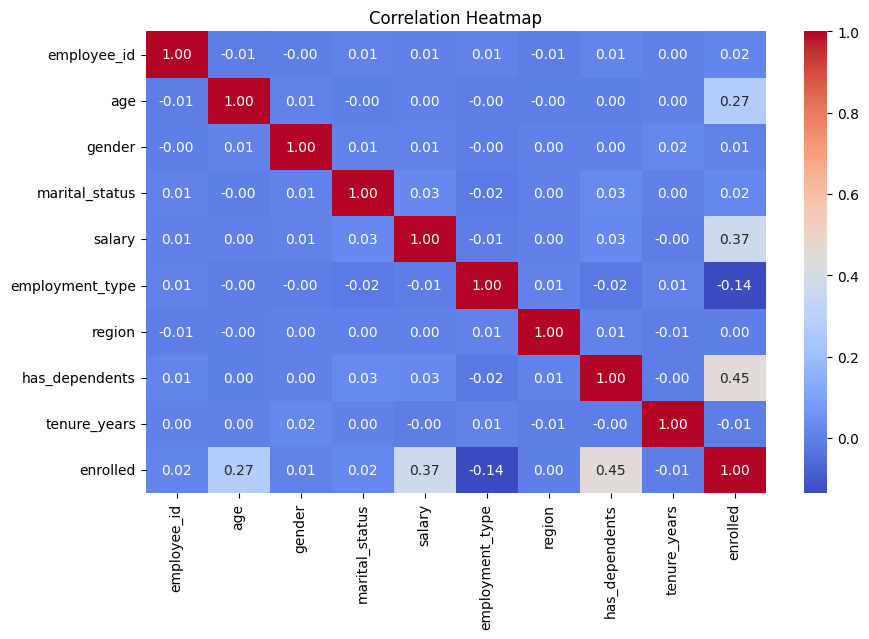

In [13]:
import numpy as np

df_corr = df.copy()
df_corr[cat_cols] = df_corr[cat_cols].astype('category').apply(lambda x: x.cat.codes)

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\uniat\App

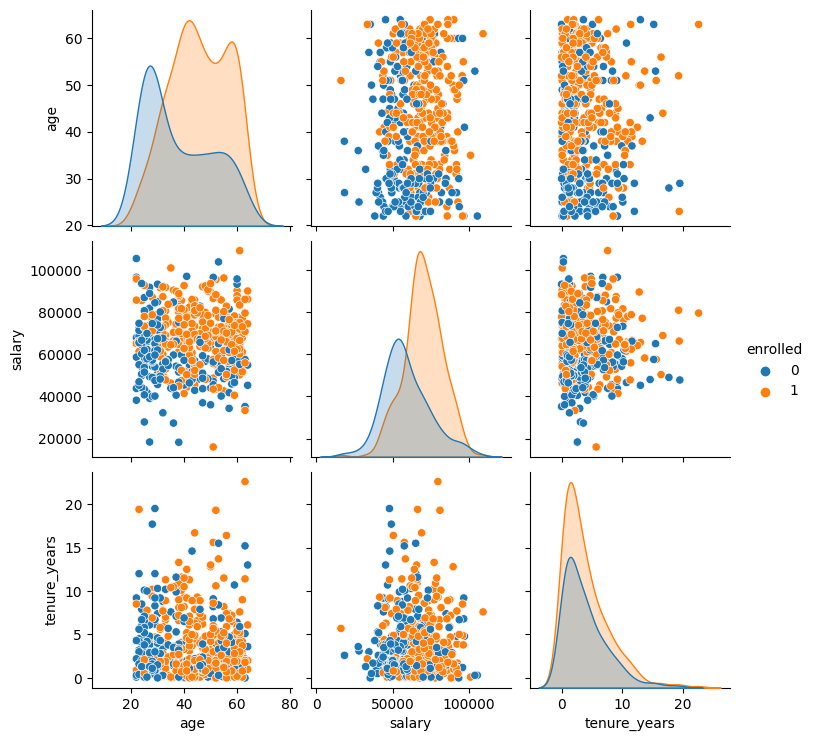

In [14]:
sns.pairplot(df.sample(500), hue='enrolled', vars=num_cols)
plt.show()


# Preprocessing & Feature Engineering

In [15]:
df = df.drop(columns=['employee_id'])  # not useful

In [16]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns

cat_features = df.select_dtypes(include=['object', 'category', 'bool']).columns

In [17]:
df['tenure_years'] = df['tenure_years'].clip(lower=0).fillna(0)
df['tenure_years'] = np.log1p(df['tenure_years'])

In [18]:
from scipy.stats import skew
df[num_features].apply(skew).sort_values(ascending=False)

tenure_years    0.144416
salary          0.003894
age            -0.001981
enrolled       -0.483106
dtype: float64

In [19]:
X = df.drop('enrolled', axis=1)
y = df['enrolled']

In [ ]:
num_features = num_features.drop('enrolled')

scaler = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

X_transformed = preprocessor.fit_transform(X)

In [ ]:
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = list(num_features) + list(cat_names)

X = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

In [ ]:
X.head()

,age,salary,tenure_years,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_type_Contract,employment_type_Full-time,employment_type_Part-time,region_Midwest,region_Northeast,region_South,region_West,has_dependents_No,has_dependents_Yes
0,1.383618,-0.664066,-0.591150,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.569629,1.642856,1.779995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.569955,0.610639,0.314246,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.709213,-0.747502,0.161570,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.139747,-0.109114,1.465245,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

# using this model because we have smaller data set
# and works well for binary classification problems
# also, it is fast to train and predict

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


import joblib
joblib.dump(model, 'models/model.pkl')

['models/model.pkl']

# Model Evaluation

Accuracy: 0.8965

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       765
           1       0.91      0.92      0.92      1235

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



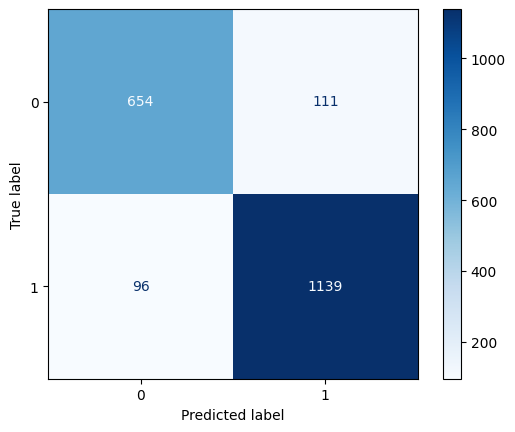

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])


print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Feature Importance

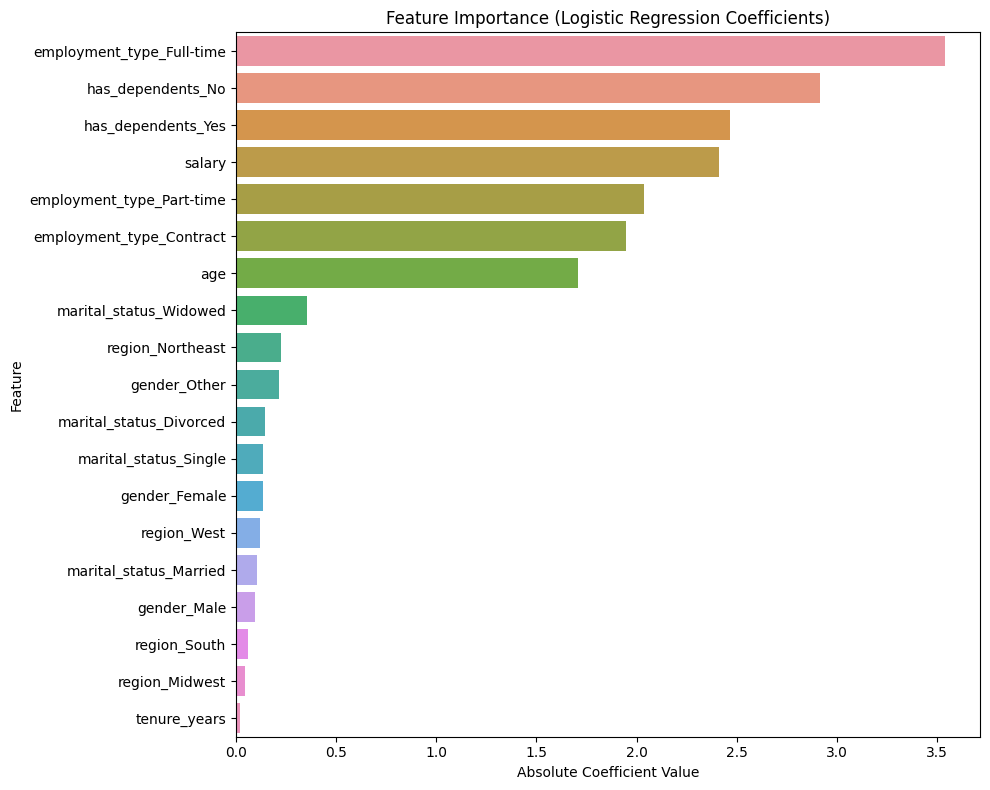

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})
coef_df['Abs_Importance'] = coef_df['Importance'].abs()
coef_df = coef_df.sort_values(by='Abs_Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Importance', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#  hyperparameter tuning and cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'penalty': ['l2'],          
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}


In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg = LogisticRegression()

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',   
    n_jobs=-1,        
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.8915


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8965
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       765
           1       0.91      0.92      0.92      1235

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000

